<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:" data-toc-modified-id="Introduction:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction:</a></span></li><li><span><a href="#Step-1.-Import-the-necessary-libraries" data-toc-modified-id="Step-1.-Import-the-necessary-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 1. Import the necessary libraries</a></span></li><li><span><a href="#Step-2.-Import-the-dataset-from-this-Online_Retail.csv-from-the-folder." data-toc-modified-id="Step-2.-Import-the-dataset-from-this-Online_Retail.csv-from-the-folder.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 2. Import the dataset from this <a href="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv" target="_blank">Online_Retail.csv</a> from the folder.</a></span></li><li><span><a href="#Step-3.-Assign-it-to-a-variable-called-online_rt" data-toc-modified-id="Step-3.-Assign-it-to-a-variable-called-online_rt-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 3. Assign it to a variable called online_rt</a></span></li><li><span><a href="#Step-4.-Create-a-histogram-with-the-10-countries-that-have-the-most-'Quantity'-ordered-except-UK" data-toc-modified-id="Step-4.-Create-a-histogram-with-the-10-countries-that-have-the-most-'Quantity'-ordered-except-UK-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK</a></span></li><li><span><a href="#Step-5.--Exclude-negative-Quatity-entries" data-toc-modified-id="Step-5.--Exclude-negative-Quatity-entries-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 5.  Exclude negative Quatity entries</a></span></li><li><span><a href="#Step-6.-Create-a-scatterplot-with-the-Quantity-per-UnitPrice-by-CustomerID-for-the-top-3-Countries" data-toc-modified-id="Step-6.-Create-a-scatterplot-with-the-Quantity-per-UnitPrice-by-CustomerID-for-the-top-3-Countries-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries</a></span></li></ul></div>

# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

%matplotlib inline

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [34]:
csvfilepath = "./data/Online_Retail.csv"
online_rt_data = pd.read_csv(csvfilepath, encoding='utf8')

In [35]:
online_rt_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Step 3. Assign it to a variable called online_rt

In [36]:
online_rt = online_rt_data.copy()
online_rt.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

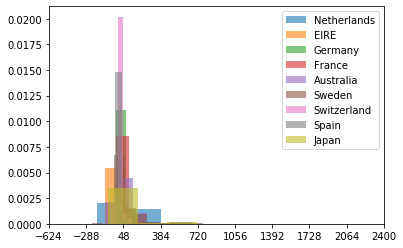

In [139]:
allexceptuk = online_rt.loc[online_rt['Country'].apply(lambda c: not c=="United Kingdom"), :]

topten = allexceptuk.groupby(["Country"]).Quantity.sum().sort_values()[-1:-10:-1]
topten_countries = topten.to_dict().keys()

plotdf = allexceptuk.loc[allexceptuk.Country.apply(lambda d: d in topten_countries),
                         ["Country", "Quantity"]]


for country in topten_countries:
    plt.hist(plotdf.loc[plotdf.Country == country].Quantity.values,
             label=country, alpha=0.6, density=True)
plt.legend();
plt.xlim(plotdf.Quantity.min(), plotdf.Quantity.max());
plt.xticks(ticks=np.linspace(plotdf.Quantity.min(),
                             plotdf.Quantity.max(),
                             num=10, endpoint=True));

### Step 5.  Exclude negative Quatity entries

In [142]:
positive_sales = online_rt.loc[online_rt['Quantity'].apply(lambda c: c > 0), :]
positive_sales.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

/home/alk/anaconda3/envs/dsci/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


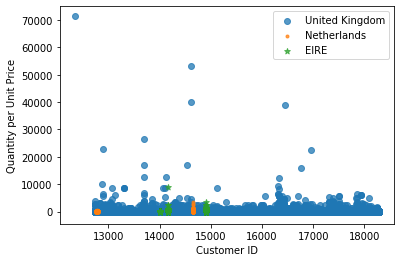

In [157]:
positive_sales["qpup"] = positive_sales.Quantity / positive_sales.UnitPrice

topthree = positive_sales.groupby(["Country"]).Quantity.sum().sort_values()[-1:-4:-1].to_dict().keys()

for country, style in zip(topthree, ['o','.','*']):
    plt.scatter(x=positive_sales.loc[positive_sales["Country"]==country,
                                     "CustomerID"].values,
                y=positive_sales.loc[positive_sales["Country"]==country,
                                     "qpup"].values,
                label=country, alpha=0.75, marker=style)
plt.legend();
plt.xlabel("Customer ID")
plt.ylabel("Quantity per Unit Price");